In [1]:
import requests
import json
import pandas
import geopandas
import geopandas.tools
from shapely.geometry import Polygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import LineString

In [8]:
# read in OAs (UK Wide File) within leeds bounds (Read in LAD file)
Leeds_Boundary_gdf = geopandas.read_file("Data/Boundaries/BoundaryData_Leeds/england_ltla_2022.shp")

# read in surface water flooding clipped
clipped_surface_water_flooding_gdf = geopandas.read_file("Data/Processed/Leeds_RoFSW_Extent_1in100_Clipped.geojson")


In [3]:
def get_osm_all_buildings():
    # Overpass API endpoint
    overpass_url = "http://overpass-api.de/api/interpreter"

    # Overpass QL query to get residential buildings in Leeds
    overpass_query = """
    [out:json][timeout:60];
    area[name="Leeds"]->.searchArea;
    (
    way["building"](area.searchArea);
    relation["building"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """

    # Make the request to the Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})

    # Check if the request was successful, load the data, and save to geojson file
    if response.status_code == 200:
        data = response.json()

        buildings_file_path = 'Data/Processed/Leeds_All_Buildings.json'

        # Save the response to a GeoJSON file
        with open(buildings_file_path, 'w') as f:
            json.dump(data, f)

        geopandas.read_file(buildings_file_path)

        
    else:
        print(f"Error: {response.status_code}")

# get_osm_all_buildings()

# Open the JSON file and load it into a dictionary
with open('Data/Processed/Leeds_All_Buildings.json', 'r') as file:
    data = json.load(file)

    # Extract elements from the response
    ways = [element for element in data['elements'] if element['type'] == 'way']
    nodes = {element['id']: (element['lon'], element['lat']) for element in data['elements'] if element['type'] == 'node'}

    # Function to construct a polygon from a way
    def way_to_polygon(way, nodes):
        coords = [(nodes[node_id][0], nodes[node_id][1]) for node_id in way['nodes'] if node_id in nodes]
        if len(coords) < 3:
            return None  # Not enough points to form a polygon
        return Polygon(coords)

    # Convert ways to polygons
    polygons = [way_to_polygon(way, nodes) for way in ways if way_to_polygon(way, nodes)]

    # Create a GeoDataFrame
    df = pandas.DataFrame({'geometry': polygons})
    buildings_gdf = geopandas.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
    buildings_gdf.to_file('Data/Processed/Leeds_OSM_All_Buildings.geojson', driver="GeoJSON")

In [5]:
def get_osm_all_roads():
    # Overpass API endpoint
    overpass_url = "http://overpass-api.de/api/interpreter"

    # Overpass QL query to get all roads in Leeds
    overpass_query = """
    [out:json][timeout:60];
    area[name="Leeds"]->.searchArea;
    (
    way["highway"](area.searchArea);
    relation["highway"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """

    # Make the request to the Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})

    # Check if the request was successful, load the data, and save to geojson file
    if response.status_code == 200:
        data = response.json()

        roads_file_path = 'Data/Processed/Leeds_All_Roads.json'

        # Save the response to a GeoJSON file
        with open(roads_file_path, 'w') as f:
            json.dump(data, f)

        geopandas.read_file(roads_file_path)

    else:
        print(f"Error: {response.status_code}")

# get_osm_all_roads()

# Open the JSON file and load it into a dictionary
with open('Data/Processed/Leeds_All_Roads.json', 'r') as file:
    data = json.load(file)

    # Extract elements from the response
    ways = [element for element in data['elements'] if element['type'] == 'way']
    nodes = {element['id']: (element['lon'], element['lat']) for element in data['elements'] if element['type'] == 'node'}

    # Function to construct a line (road) from a way
    def way_to_linestring(way, nodes):
        coords = [(nodes[node_id][0], nodes[node_id][1]) for node_id in way['nodes'] if node_id in nodes]
        if len(coords) < 2:
            return None  # Not enough points to form a line
        return LineString(coords)

    # Convert ways to linestrings (roads)
    linestrings = [way_to_linestring(way, nodes) for way in ways if way_to_linestring(way, nodes)]

    # Create a GeoDataFrame
    df = pandas.DataFrame({'geometry': linestrings})
    roads_gdf = geopandas.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
    roads_gdf.to_file('Data/Processed/Leeds_OSM_All_Roads.geojson', driver="GeoJSON")

In [7]:
def get_osm_all_railways():
    # Overpass API endpoint
    overpass_url = "http://overpass-api.de/api/interpreter"

    # Overpass QL query to get all railways in Leeds
    overpass_query = """
    [out:json][timeout:60];
    area[name="Leeds"]->.searchArea;
    (
    way["railway"](area.searchArea);
    relation["railway"](area.searchArea);
    );
    out body;
    >;
    out skel qt;
    """

    # Make the request to the Overpass API
    response = requests.get(overpass_url, params={'data': overpass_query})

    # Check if the request was successful, load the data, and save to geojson file
    if response.status_code == 200:
        data = response.json()

        railways_file_path = 'Data/Processed/Leeds_All_Railways.json'

        # Save the response to a GeoJSON file
        with open(railways_file_path, 'w') as f:
            json.dump(data, f)

        geopandas.read_file(railways_file_path)

    else:
        print(f"Error: {response.status_code}")

# get_osm_all_railways()

# Open the JSON file and load it into a dictionary
with open('Data/Processed/Leeds_All_Railways.json', 'r') as file:
    data = json.load(file)

    # Extract elements from the response
    ways = [element for element in data['elements'] if element['type'] == 'way']
    nodes = {element['id']: (element['lon'], element['lat']) for element in data['elements'] if element['type'] == 'node'}

    # Function to construct a line (railway) from a way
    def way_to_linestring(way, nodes):
        coords = [(nodes[node_id][0], nodes[node_id][1]) for node_id in way['nodes'] if node_id in nodes]
        if len(coords) < 2:
            return None  # Not enough points to form a line
        return LineString(coords)

    # Convert ways to linestrings (railways)
    linestrings = [way_to_linestring(way, nodes) for way in ways if way_to_linestring(way, nodes)]

    # Create a GeoDataFrame
    df = pandas.DataFrame({'geometry': linestrings})
    railways_gdf = geopandas.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
    railways_gdf.to_file('Data/Processed/Leeds_OSM_All_Railways.geojson', driver="GeoJSON")


In [18]:
Leeds_buildings_gdf = geopandas.read_file("Data/Processed/Leeds_OSM_All_Buildings.geojson")
Leeds_roads_gdf = geopandas.read_file("Data/Processed/Leeds_OSM_All_Roads.geojson")
Leeds_rail_gdf = geopandas.read_file("Data/Processed/Leeds_OSM_All_Railways.geojson")

In [14]:
# Clip to leeds bounds
# Fix invalid geometries in both GeoDataFrames
Leeds_buildings_gdf = Leeds_buildings_gdf.to_crs(27700)
Leeds_buildings_gdf["geometry"] = Leeds_buildings_gdf.buffer(0)
Leeds_Boundary_gdf["geometry"] = Leeds_Boundary_gdf.buffer(0)
clipped_building_gdf = geopandas.clip(Leeds_buildings_gdf, Leeds_Boundary_gdf)

In [38]:
Leeds_roads_gdf = Leeds_roads_gdf.to_crs(27700)
Leeds_roads_gdf['id'] = Leeds_roads_gdf.index + 1
clipped_roads_gdf = geopandas.clip(Leeds_roads_gdf, Leeds_Boundary_gdf)

In [20]:
Leeds_rail_gdf = Leeds_rail_gdf.to_crs(27700)
clipped_rail_gdf = geopandas.clip(Leeds_rail_gdf, Leeds_Boundary_gdf)


In [21]:
clipped_building_gdf.to_file('Data/Processed/Leeds_OSM_All_Buildings_Clipped.geojson', driver="GeoJSON")
clipped_roads_gdf.to_file('Data/Processed/Leeds_OSM_All_Roads_Clipped.geojson', driver="GeoJSON")
clipped_rail_gdf.to_file('Data/Processed/Leeds_OSM_All_Railways_Clipped.geojson', driver="GeoJSON")

In [59]:
clipped_building_at_risk_gdf = geopandas.sjoin(clipped_building_gdf, clipped_surface_water_flooding_gdf, how="inner", op="intersects")
# clipped_building_at_risk_gdf.to_file("Data/Processed/Results/infrastructure_flooding_buildings_at_risk.geojson", driver="GeoJSON")

clipped_roads_at_risk_gdf = geopandas.sjoin(clipped_roads_gdf, clipped_surface_water_flooding_gdf, how="inner", op="intersects")
# clipped_roads_at_risk_gdf.to_file("Data/Processed/Results/infrastructure_flooding_roads_at_risk.geojson", driver="GeoJSON")

clipped_rail_at_risk_gdf = geopandas.sjoin(clipped_rail_gdf, clipped_surface_water_flooding_gdf, how="inner", op="intersects")
# clipped_rail_at_risk_gdf.to_file("Data/Processed/Results/infrastructure_flooding_rails_at_risk.geojson", driver="GeoJSON")

/Users/alexandertrout/opt/anaconda3/envs/mac_conda_py3_10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/alexandertrout/opt/anaconda3/envs/mac_conda_py3_10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/alexandertrout/opt/anaconda3/envs/mac_conda_py3_10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [60]:
clipped_building_at_risk_gdf = clipped_building_at_risk_gdf.drop_duplicates(subset='geometry')
clipped_roads_at_risk_gdf = clipped_roads_at_risk_gdf.drop_duplicates(subset='geometry')
clipped_rail_at_risk_gdf = clipped_rail_at_risk_gdf.drop_duplicates(subset='geometry')

In [61]:
# // get new road network (non-flooded roads) 
# print(clipped_roads_gdf.columns)
# print(clipped_roads_at_risk_gdf.columns)

# Filter rows in clipped_roads_gdf that are not in clipped_roads_at_risk_gdf
roads_not_at_risk_difference_gdf = clipped_roads_gdf[~clipped_roads_gdf['id'].isin(clipped_roads_at_risk_gdf['id'])]
roads_not_at_risk_difference_gdf.to_file("Data/Processed/Results/roads_not_at_risk_difference_df.geojson", driver="GeoJSON")

In [62]:
results_dict = {
    "Name": [],
    "Value all": [],
    "Value at Risk": []
} 

# // osm_buildings
total_length_buildings = clipped_building_gdf['geometry'].area.sum()
total_length_buildings_at_risk = clipped_building_at_risk_gdf['geometry'].area.sum()
print(len(clipped_building_gdf))
print(len(clipped_building_at_risk_gdf))
results_dict['Name'].append('Building area (m2)')
results_dict['Value all'].append(total_length_buildings)
results_dict['Value at Risk'].append(total_length_buildings_at_risk)


# osm_roads 
total_length_roads = clipped_roads_gdf['geometry'].length.sum()
total_length_roads_at_risk = clipped_roads_at_risk_gdf['geometry'].length.sum()
print(len(clipped_roads_gdf))
print(len(clipped_roads_at_risk_gdf))
results_dict['Name'].append('Roads length (m)')
results_dict['Value all'].append(total_length_roads)
results_dict['Value at Risk'].append(total_length_roads_at_risk)


# osm_rails
total_length_rails = clipped_rail_gdf['geometry'].length.sum()
print(len(clipped_rail_gdf))
print(len(clipped_rail_at_risk_gdf))
total_length_rails_at_risk = clipped_rail_at_risk_gdf['geometry'].length.sum()
results_dict['Name'].append('Rail length (m)')
results_dict['Value all'].append(total_length_rails)
results_dict['Value at Risk'].append(total_length_rails_at_risk)



def output_csv_results():
    pandas.set_option('display.float_format', '{:,.2f}'.format)
    results_df = pandas.DataFrame(results_dict)
    results_df['At risk percentage'] = (results_df['Value at Risk'] / results_df['Value all']) * 100
    # results_df.to_csv(f'Data/Processed/Results/infrastructure_flooding_table_results.csv')
    print(results_df)
    return results_df

output_csv_results()


302249
13352
75661
18478
1305
523
                 Name     Value all  Value at Risk  At risk percentage
0  Building area (m2) 31,811,956.77   5,208,671.41               16.37
1    Roads length (m)  7,752,099.03   3,102,465.21               40.02
2     Rail length (m)    451,398.61     315,263.16               69.84


,Name,Value all,Value at Risk,At risk percentage
0,Building area (m2),"31,811,956.77","5,208,671.41",16.37
1,Roads length (m),"7,752,099.03","3,102,465.21",40.02
2,Rail length (m),"451,398.61","315,263.16",69.84


testing...


In [48]:
# // need to do this on the road network NOT intersected by flooding to get the new road network... 

import geopandas as gpd
import networkx as nx
from shapely.geometry import LineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Create a function to get nodes from LineString (start and end points of each road segment)
def get_nodes_from_linestring(geom):
    if isinstance(geom, LineString):
        coords = list(geom.coords)
        return coords[0], coords[-1]  # start and end points
    else:
        return None

# Create a graph from the road network
G = nx.Graph()

# Add edges (roads) to the graph
for idx, row in roads_not_at_risk_difference_gdf.iterrows():
    nodes = get_nodes_from_linestring(row.geometry)
    if nodes:
        road_id = row['id']
        G.add_edge(nodes[0], nodes[1], id=road_id)  # Add the road segment as an edge

# Identify connected components
connected_components = list(nx.connected_components(G))

# Find the largest connected component (assumed to be the main network)
largest_component = max(connected_components, key=len)

# Identify roads that are part of smaller components (i.e., disconnected roads)
disconnected_roads_idx = []

for component in connected_components:
    if component != largest_component:
        for node in component:
            # Get all edges connected to this component
            for neighbor in G.neighbors(node):
                edge_data = G.get_edge_data(node, neighbor)
                disconnected_roads_idx.append(edge_data['id'])

# Filter out disconnected roads from the original GeoDataFrame
disconnected_roads_gdf = roads_not_at_risk_difference_gdf.loc[roads_not_at_risk_difference_gdf['id'].isin(disconnected_roads_idx)]
connected_roads_gdf = roads_not_at_risk_difference_gdf.loc[~roads_not_at_risk_difference_gdf['id'].isin(disconnected_roads_idx)]

# Save the disconnected roads to a new shapefile or visualize
disconnected_roads_gdf.to_file('Data/Processed/Results/infrastructure_disconnected_roads.geojson', driver='GeoJSON')
# disconnected_roads_gdf.plot()
# plt.show()

connected_roads_gdf.to_file('Data/Processed/Results/infrastructure_connected_roads.geojson', driver='GeoJSON')
# connected_roads_gdf.plot()
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

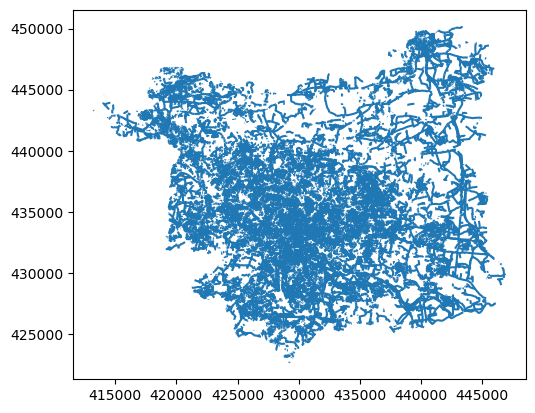

In [45]:
# disconnected_roads_gdf_unique = disconnected_roads_gdf.drop_duplicates(subset=['id'])
# disconnected_roads_gdf_unique.plot()
# disconnected_roads_gdf_unique.to_file('Data/Processed/Results/infrastructure_disconnected_roads.geojson', driver='GeoJSON')

# plt.show

